In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [103]:

main_df = pd.read_csv('Bengaluru_House_Data.csv')
main_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [104]:
main_df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [105]:
a_df = main_df.drop(['availability', 'society','balcony'], axis='columns')
a_df

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [106]:
a_df.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [107]:
a_df = a_df.dropna()
a_df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

data cleaning

there is problem in size with BHK/bedroom

In [108]:
a_df['size'] = a_df['size'].apply(lambda x: int(x.split(' ')[0]))
a_df.head(3)

C:\Users\User\AppData\Local\Temp\ipykernel_13048\585637680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df['size'] = a_df['size'].apply(lambda x: int(x.split(' ')[0]))


,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,62.00


In [109]:
a_df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [110]:
a_df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [111]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [112]:
a_df[~a_df['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,price
30,Super built-up Area,Yelahanka,4,2100 - 2850,4.0,186.000
122,Super built-up Area,Hebbal,4,3067 - 8156,4.0,477.000
137,Super built-up Area,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Super built-up Area,Sarjapur,2,1145 - 1340,2.0,43.490
188,Super built-up Area,KR Puram,2,1015 - 1540,2.0,56.800
410,Super built-up Area,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Super built-up Area,Hennur Road,2,1195 - 1440,2.0,63.770
648,Built-up Area,Arekere,9,4125Perch,9.0,265.000
661,Super built-up Area,Yelahanka,2,1120 - 1145,2.0,48.130
672,Built-up Area,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [113]:
def convert_sq_to_num(x):
    tokens = x.split('-')
    if (len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [114]:
a_df['total_sqft'] = a_df['total_sqft'].apply(convert_sq_to_num)
a_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13048\2452765605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df['total_sqft'] = a_df['total_sqft'].apply(convert_sq_to_num)


,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,51.00


In [115]:
a_df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

# in this data set some outliers
# apply feature engniering 

size

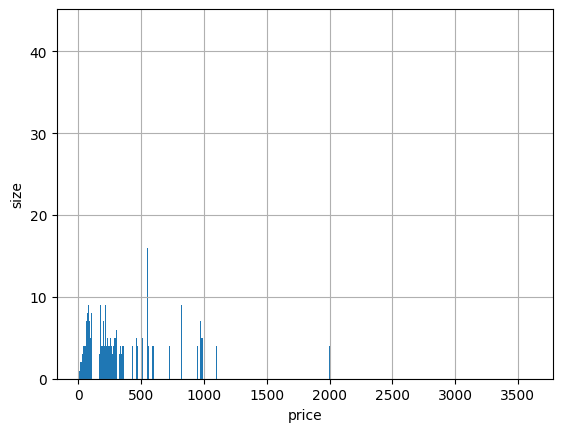

In [116]:
plt.bar(a_df['price'], a_df['size'])
plt.xlabel("price")
plt.ylabel("size")
plt.grid()

In [117]:
max_thresold=a_df['size'].quantile(0.99)
min_thresold=a_df['size'].quantile(0.001)
b_df = a_df[ (a_df['size']<max_thresold) & (a_df['size']>min_thresold)]

In [118]:
a_df.shape[0]-b_df.shape[0]

818

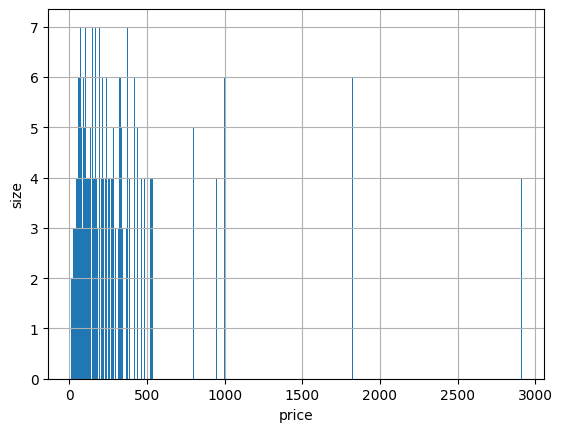

In [119]:
plt.bar(b_df['price'], b_df['size'])
plt.xlabel("price")
plt.ylabel("size")
plt.grid()

total_sqft

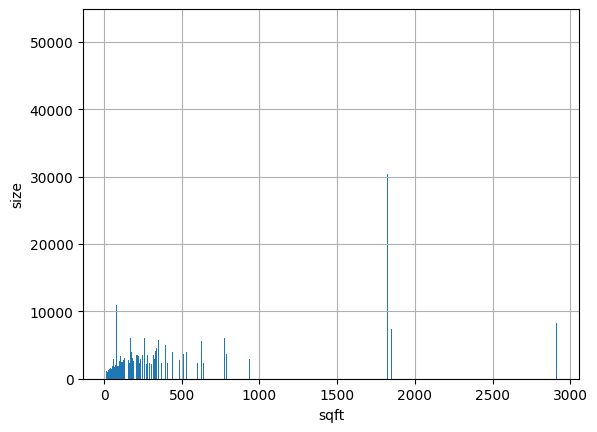

In [120]:
plt.bar(b_df['price'], b_df['total_sqft'])
plt.xlabel("sqft")
plt.ylabel("size")
plt.grid()

In [121]:
max_thresold=b_df['total_sqft'].quantile(0.99)
min_thresold=b_df['total_sqft'].quantile(0.2)
c_df = b_df[(b_df['total_sqft']<max_thresold) & (b_df['total_sqft']>min_thresold)]

In [122]:
b_df.shape[0]-c_df.shape[0]

2667

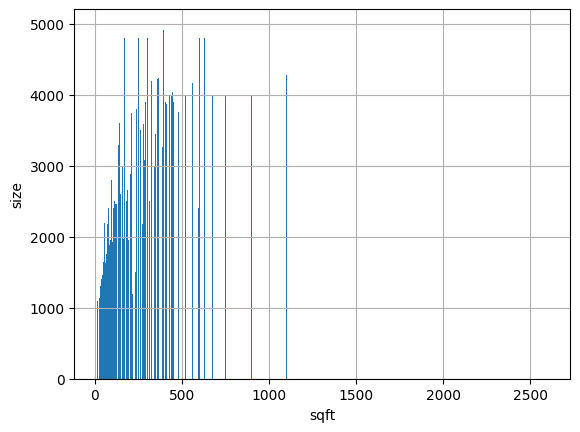

In [123]:
plt.bar(c_df['price'], c_df['total_sqft'])
plt.xlabel("sqft")
plt.ylabel("size")
plt.grid()

bath

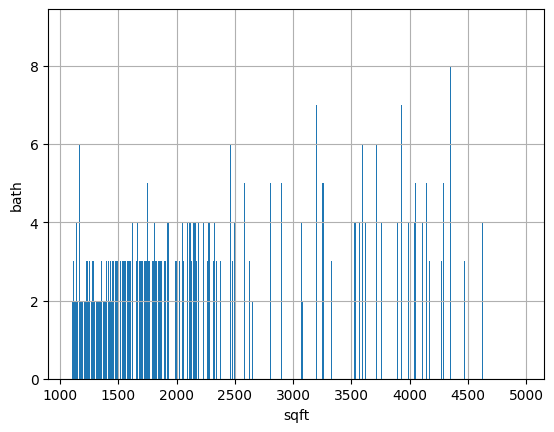

In [124]:
plt.bar(c_df['total_sqft'], c_df['bath'])
plt.xlabel("sqft")
plt.ylabel("bath")
plt.grid()

In [125]:
max_thresold=c_df['bath'].quantile(0.999)
min_thresold=c_df['bath'].quantile(0.001)
d_df = c_df[ (c_df['bath']<max_thresold) & (c_df['bath']>min_thresold)]

In [126]:
c_df.shape[0]-d_df.shape[0]

73

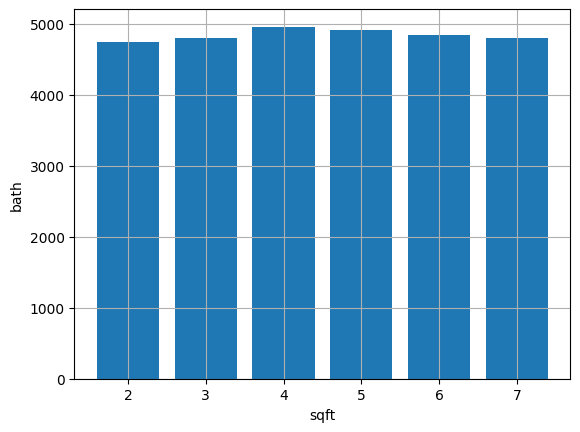

In [127]:
plt.bar(d_df['bath'], d_df['total_sqft'])
plt.xlabel("sqft")
plt.ylabel("bath")
plt.grid()

price

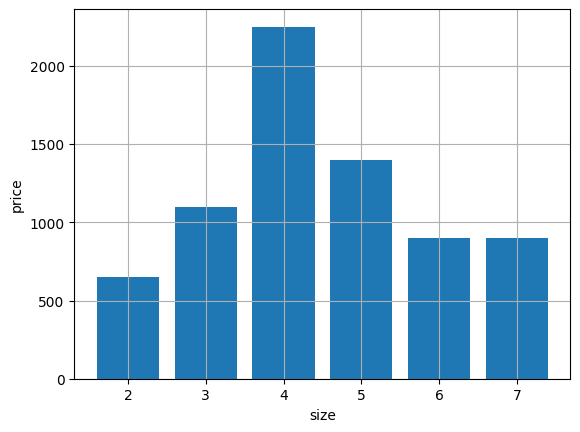

In [128]:
plt.bar(d_df['size'], d_df['price'])
plt.xlabel("size")
plt.ylabel("price")
plt.grid()

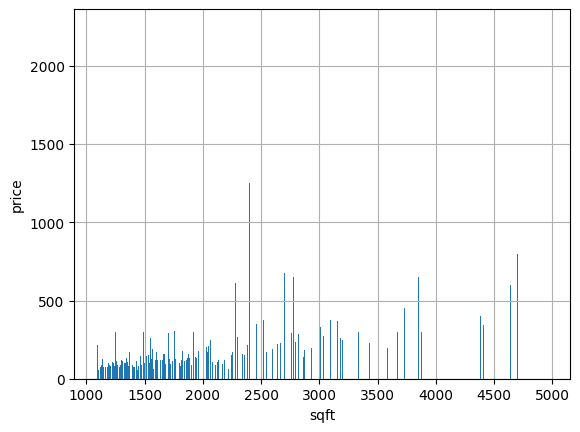

In [129]:
plt.bar(d_df['total_sqft'], d_df['price'])
plt.xlabel("sqft")
plt.ylabel("price")
plt.grid()

In [130]:
max_thresold=d_df['price'].quantile(0.9999)
min_thresold=d_df['price'].quantile(0.01)
e_df = d_df[ (d_df['price']<max_thresold) & (d_df['price']>min_thresold)]

In [131]:
d_df.shape[0]-e_df.shape[0]

100

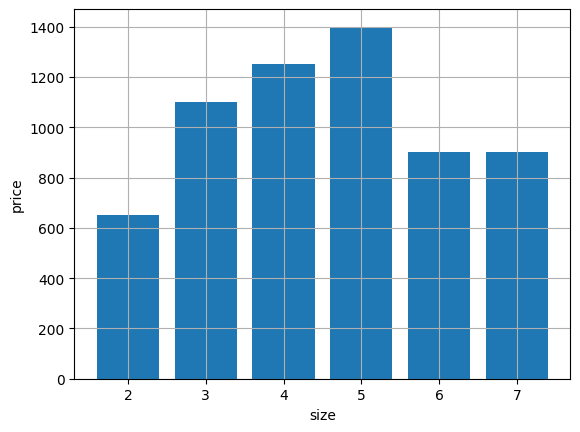

In [132]:
plt.bar(e_df['size'], e_df['price'])
plt.xlabel("size")
plt.ylabel("price")
plt.grid()

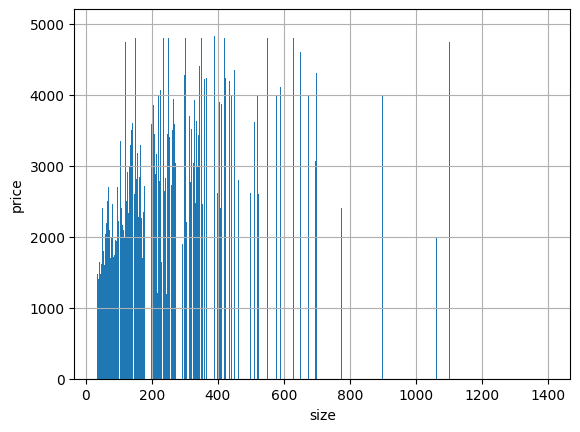

In [133]:
plt.bar(e_df['price'], e_df['total_sqft'])
plt.xlabel("size") 
plt.ylabel("price")
plt.grid()

# deal with dummy variable 

In [134]:
dummy_areaType = pd.get_dummies(e_df['area_type'])
dummy_areaType.head(3)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1


In [135]:
dummy_location	 = pd.get_dummies(e_df['location'])
dummy_location.head(3)	

,Devarabeesana Halli,Devarachikkanahalli,Mysore Highway,south,1A Block Koramangala,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,...,near Ramanashree California resort,pavitra paradise,"ravindra nagar, T.dasarahalli peenya",rr nagar,sarjapura main road,singapura paradise,t.c palya,tc.palya,vinayakanagar,"white field,kadugodi"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
f_df = e_df.drop(['area_type', 'location'], axis='columns')
f_df.head(3)

,size,total_sqft,bath,price
1,4,2600.0,5.0,120.0
2,3,1440.0,2.0,62.0
3,3,1521.0,3.0,95.0


In [137]:
g_df = pd.concat([f_df,dummy_location],axis="columns")
g_df.head(3)

,size,total_sqft,bath,price,Devarabeesana Halli,Devarachikkanahalli,Mysore Highway,south,1A Block Koramangala,1st Block BEL Layout,...,near Ramanashree California resort,pavitra paradise,"ravindra nagar, T.dasarahalli peenya",rr nagar,sarjapura main road,singapura paradise,t.c palya,tc.palya,vinayakanagar,"white field,kadugodi"
1,4,2600.0,5.0,120.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440.0,2.0,62.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521.0,3.0,95.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
main_df.shape

(13320, 9)

# Model bulding 

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x = g_df.drop(['price'], axis="columns")
x.head(3)

,size,total_sqft,bath,Devarabeesana Halli,Devarachikkanahalli,Mysore Highway,south,1A Block Koramangala,1st Block BEL Layout,1st Block HBR Layout,...,near Ramanashree California resort,pavitra paradise,"ravindra nagar, T.dasarahalli peenya",rr nagar,sarjapura main road,singapura paradise,t.c palya,tc.palya,vinayakanagar,"white field,kadugodi"
1,4,2600.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
x.isnull().sum()

size                    0
total_sqft              0
bath                    0
 Devarabeesana Halli    0
 Devarachikkanahalli    0
                       ..
singapura paradise      0
t.c palya               0
tc.palya                0
vinayakanagar           0
white field,kadugodi    0
Length: 1097, dtype: int64

In [142]:
y = g_df.price
y=y.astype(int)
y.head(3)

1    120
2     62
3     95
Name: price, dtype: int32

In [143]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [144]:
from sklearn.model_selection import train_test_split
y=y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=10)



from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6268439771836591

hyper-tuning

In [145]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

in graph

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.svm import SVC
scor_svm = cross_val_score(SVC(), x, y)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LinearRegression
scor_reg = cross_val_score(LinearRegression(), x, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
scor_log= cross_val_score(LogisticRegression(max_iter=10000),x, y)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
scor_ran= cross_val_score(RandomForestClassifier(), x, y)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scor_kn = cross_val_score(KNeighborsClassifier(n_neighbors=50),x,y)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
import numpy as np
test = ['test1', 'test2', 'test3', 'test4','test5']
xpos = np.arange(len(test))
xpos

array([0, 1, 2, 3, 4])

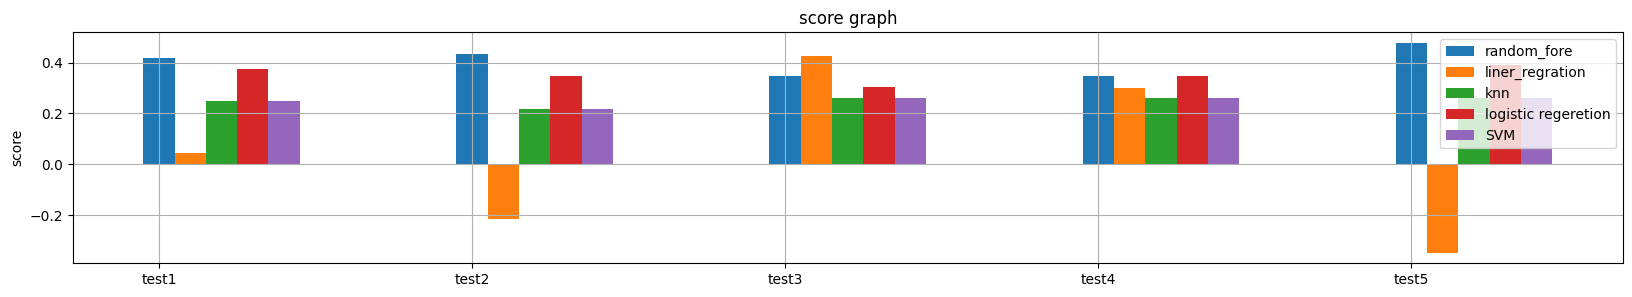

In [ ]:
plt.figure(figsize=(20,3))
plt.xticks(xpos, test)
plt.ylabel('score')
plt.title('score graph')
plt.bar(xpos, scor_ran,width=0.1, label ='random_fore')
plt.bar(xpos+0.1, scor_reg,width=0.1, label = 'liner_regration')
plt.bar(xpos+0.2, scor_kn,width=0.1, label = 'knn')
plt.bar(xpos+0.3, scor_log,width=0.1, label = 'logistic regeretion')
plt.bar(xpos+0.4, scor_svm,width=0.1, label = 'SVM')
plt.legend()
plt.grid()

In [ ]:
from sklearn.model_selection import train_test_split
y=y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=10)

random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train,y_train)
random_forest_clf.score(X_test,y_test)

0.375

Test the model for few properties

In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    y = np.zeros(len(x.columns))
    y[0] = sqft
    y[1] = bath
    y[2] = bhk
    if loc_index >= 0:
        y[loc_index] = 1

    return random_forest_clf.predict([y])[0]

In [ ]:
predict_price('Basavanapura',1000, 2, 2)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


46

In [ ]:
dummy_areaType = pd.get_dummies(e_df['area_type'])
dummy_areaType.head(3)

,Built-up Area,Super built-up Area
148,0,1
198,0,1
326,0,1


In [ ]:
x

,size,total_sqft,bath,Addischetan Layout,Akshaya Nagar,Ananth Nagar,Banashankari,Banashankari Stage V,Bannerghatta Road,Basavanapura,...,Suraksha Nagar,TC Palaya,Thirumenahalli,Uttarahalli,Varthur,Vasantha Vallabha Nagar,Whitefield,Yelahanka,Built-up Area,Super built-up Area
148,3,1612.0,3.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
198,3,1400.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
326,3,1464.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
436,3,1450.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,3,1464.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13068,3,1365.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13131,3,1330.0,3.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
13152,3,1464.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13172,3,1464.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
